# Study of mobile banking and challenges in India

- it is a term paper in M.Sc Economics course, IIT Roorkee
- Subject name - Financial Economics
- guide : prof Manish K. Singh


## Topic of project 
- To study about the benefits and limitations of mobile banking. 
- To identify the problems faced by the customers through mobile banking.


## Research questions

- What are the convincing feature that make people to use Mobile Banking.
- User percentage across different Education level : Does Education level metters ?
- What are the most concern thing about mobile Banking for non user ?
- Does Age-Group matters ?

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
%matplotlib inline
pd.set_option('display.max_columns', None)

In [24]:
df = pd.read_csv('E:/Desktop/edu-metarial/Msc_eco_class meterial/Study of mobile banking and challenges in India.csv')

In [25]:
df.head()

,Timestamp,What’s your education level ?,What’s your age group ?,Do you use mobile banking,Why do you use Mobile banking service ? ( Choose two preferred options.),Why don’t you use Mobile banking ?( *Choose two preferred options ),What is your average monthly mobile banking transaction amount ?,What is your average number of mobile banking transaction monthly ?,Have you faced any online transaction fraud ?,Ever did you place mis-transaction (sent to other person rather than actual person ) ?,What is your working profile ?,Would you like to use Mobile banking in future ?
0,2021/10/16 8:11:02 PM GMT+5:30,Higher educated,18- 25,Yes,Mobile banking is easy to use;Time saver appli...,I use Mobile banking,Below 10000,Below 10,No,No,Student,Yes
1,2021/10/16 8:16:22 PM GMT+5:30,Higher educated,18- 25,Yes,Mobile banking is easy to use;Time saver appli...,I use Mobile banking,Below 10000,between 10 – 50,No,No,Student,Yes
2,2021/10/16 8:18:36 PM GMT+5:30,Higher educated,18- 25,Yes,Mobile banking is easy to use;Available 24 hours,I use Mobile banking,Between 100000 to 500000,between 10 – 50,Yes,"Yes, but I did not get money back",Self Employ,Yes
3,2021/10/16 8:20:14 PM GMT+5:30,Secondary educated,18- 25,No,Available 24 hours,No use for me,Below 10000,NaN,No,No,Student,Not sure
4,2021/10/16 8:21:08 PM GMT+5:30,Higher educated,18- 25,Yes,Available 24 hours,Required facility not available;I am not eligible,Below 10000,Below 10,No,"yes, but I got my money back to account",Student,Yes


In [26]:
## knowing about age categories
df['What’s  your age group ?'].unique()

array(['18- 25', '26 – 45', 'Below 18', '46- 60', '60 above'],
      dtype=object)

In [27]:
## Sample Size

print('Sample size is :',len(df))

Sample size is : 164


In [28]:
## getting list of columns
df.columns

Index(['Timestamp', 'What’s your education level ? ',
       'What’s  your age group ?', 'Do you use mobile banking',
       'Why do you use Mobile banking service ? ( Choose two preferred  options.) ',
       'Why don’t you use Mobile  banking  ?( *Choose two preferred options )',
       'What is your average monthly mobile banking transaction amount ?',
       'What is your average  number of mobile banking transaction monthly ?',
       '  Have you faced any online transaction fraud  ?                    ',
       'Ever did you place  mis-transaction (sent to  other person rather than actual person ) ?',
       'What is your working profile ?',
       'Would you like to use Mobile banking in future ?'],
      dtype='object')

In [29]:
## Removing Noise from columns : 'Why do you use Mobile banking service ? ( Choose two preferred  options.) ' , 'Why don’t you use Mobile  banking  ?( *Choose two preferred options )'

j = 0
for i in df['Do you use mobile banking'] :
    if i == 'No' :
        df.loc[j,'Why do you use Mobile banking service ? ( Choose two preferred  options.) '] = 'Not use'
        df.loc[j,'Ever did you place  mis-transaction (sent to  other person rather than actual person ) ?'] = 'No'
        df.loc[j,'  Have you faced any online transaction fraud  ?                    '] = 'No'
        df.loc[j,'What is your average monthly mobile banking transaction amount ?'] = 0
        df.loc[j,'What is your average  number of mobile banking transaction monthly ?'] =0
    if i == 'Yes' :
        df.loc[j,'Why don’t you use Mobile  banking  ?( *Choose two preferred options )'] = 'use'
    j = j+1

In [30]:
df.head()

,Timestamp,What’s your education level ?,What’s your age group ?,Do you use mobile banking,Why do you use Mobile banking service ? ( Choose two preferred options.),Why don’t you use Mobile banking ?( *Choose two preferred options ),What is your average monthly mobile banking transaction amount ?,What is your average number of mobile banking transaction monthly ?,Have you faced any online transaction fraud ?,Ever did you place mis-transaction (sent to other person rather than actual person ) ?,What is your working profile ?,Would you like to use Mobile banking in future ?
0,2021/10/16 8:11:02 PM GMT+5:30,Higher educated,18- 25,Yes,Mobile banking is easy to use;Time saver appli...,use,Below 10000,Below 10,No,No,Student,Yes
1,2021/10/16 8:16:22 PM GMT+5:30,Higher educated,18- 25,Yes,Mobile banking is easy to use;Time saver appli...,use,Below 10000,between 10 – 50,No,No,Student,Yes
2,2021/10/16 8:18:36 PM GMT+5:30,Higher educated,18- 25,Yes,Mobile banking is easy to use;Available 24 hours,use,Between 100000 to 500000,between 10 – 50,Yes,"Yes, but I did not get money back",Self Employ,Yes
3,2021/10/16 8:20:14 PM GMT+5:30,Secondary educated,18- 25,No,Not use,No use for me,0,0,No,No,Student,Not sure
4,2021/10/16 8:21:08 PM GMT+5:30,Higher educated,18- 25,Yes,Available 24 hours,use,Below 10000,Below 10,No,"yes, but I got my money back to account",Student,Yes


In [31]:
## Creating Dummy DataFrame 
df1 = pd.DataFrame(index= range(0,len(df)),columns = df.columns)

## creating New columns for having more than one categorical values 
df1[['Adv_easy_to_use','Adv_Time saver','Adv_low_cost','Adv_24_hours','Adv_easy transaction','Dis_handset_issue',
    'Dis_hard to use','Dis_facility not available','Dis_Security_issue','Dis_ not eligible','Dis_ not aware']] = np.nan

In [32]:
## columns that will be direct assigned to Dummy DataFrame
col1 = ['Timestamp', 'What’s your education level ? ',
       'What’s  your age group ?', 'Do you use mobile banking',
       'What is your average monthly mobile banking transaction amount ?',
       'What is your average  number of mobile banking transaction monthly ?',
       '  Have you faced any online transaction fraud  ?                    ',
       'Ever did you place  mis-transaction (sent to  other person rather than actual person ) ?',
       'What is your working profile ?',
       'Would you like to use Mobile banking in future ?']

## Filling Dummy Dataframe

In [33]:
for i in col1 :
    df1[i] = df[i]

In [34]:
## Encoding the column : "Why do you use Mobile banking service ? ( Choose two preferred options.)"

j =0
for i in df['Why do you use Mobile banking service ? ( Choose two preferred  options.) ']:
    txt = re.findall("Mobile banking is easy to use|Time saver application|Low transaction cost|Available 24 hours|It provides easy transaction",i)
    if 'Mobile banking is easy to use' in txt :
        df1.loc[j,'Adv_easy_to_use'] = 1
    else :
        df1.loc[j,'Adv_easy_to_use'] = 0
        
    if 'Time saver application' in txt :
        df1.loc[j,'Adv_Time saver']=1
    else :
        df1.loc[j,'Adv_Time saver']=0
    if 'Low transaction cost' in txt :
        df1.loc[j,'Adv_low_cost']=1
    else :
        df1.loc[j,'Adv_low_cost']=0
    if 'Available 24 hours' in txt :
        df1.loc[j,'Adv_24_hours']=1
    else :
        df1.loc[j,'Adv_24_hours']=0
    if 'It provides easy transaction' in txt :
        df1.loc[j,'Adv_easy transaction']=1
    else :
        df1.loc[j,'Adv_easy transaction']=0
    j = j +1
    
    

In [35]:
## Encoding the column : ' Why don’t you use Mobile  banking  ?( *Choose two preferred options ) '

j =0
for i in  df['Why don’t you use Mobile  banking  ?( *Choose two preferred options )'] :
    txt = re.findall("My handset does not have the capability to use mobile banking|Mobile banking is hard to use|Required facility not available|Security issues|I am not eligible|I am not aware about Mobile Banking",i)
    if 'My handset does not have the capability to use mobile banking' in txt :
        df1.loc[j,'Dis_handset_issue'] = 1
    else :
        df1.loc[j,'Dis_handset_issue'] = 0
        
    if 'Mobile banking is hard to use' in txt :
        df1.loc[j,'Dis_hard to use']=1
    else :
        df1.loc[j,'Dis_hard to use']=0
        
    if 'Required facility not available' in txt :
        df1.loc[j,'Dis_facility not available']=1
    else :
        df1.loc[j,'Dis_facility not available']=0
    if 'Security issues' in txt :
        df1.loc[j,'Dis_Security_issue']=1
    else :
        df1.loc[j,'Dis_Security_issue']=0
        
    if 'I am not eligible' in txt :
        df1.loc[j,'Dis_ not eligible']=1
    else :
        df1.loc[j,'Dis_ not eligible']=0
    if 'I am not aware about Mobile Banking' in txt :
        df1.loc[j,'Dis_ not aware']=1
    else :
        df1.loc[j,'Dis_ not aware']=0
        
    j = j +1
    

In [36]:
## Dropping the columns which are not usefull

df1.drop(['Timestamp','Why do you use Mobile banking service ? ( Choose two preferred  options.) ',
           'Why don’t you use Mobile  banking  ?( *Choose two preferred options )'],axis =1, inplace = True)

In [37]:
df1.head()

,What’s your education level ?,What’s your age group ?,Do you use mobile banking,What is your average monthly mobile banking transaction amount ?,What is your average number of mobile banking transaction monthly ?,Have you faced any online transaction fraud ?,Ever did you place mis-transaction (sent to other person rather than actual person ) ?,What is your working profile ?,Would you like to use Mobile banking in future ?,Adv_easy_to_use,Adv_Time saver,Adv_low_cost,Adv_24_hours,Adv_easy transaction,Dis_handset_issue,Dis_hard to use,Dis_facility not available,Dis_Security_issue,Dis_ not eligible,Dis_ not aware
0,Higher educated,18- 25,Yes,Below 10000,Below 10,No,No,Student,Yes,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Higher educated,18- 25,Yes,Below 10000,between 10 – 50,No,No,Student,Yes,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Higher educated,18- 25,Yes,Between 100000 to 500000,between 10 – 50,Yes,"Yes, but I did not get money back",Self Employ,Yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Secondary educated,18- 25,No,0,0,No,No,Student,Not sure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Higher educated,18- 25,Yes,Below 10000,Below 10,No,"yes, but I got my money back to account",Student,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
## Number of people in different age group in Sample

df1['What’s  your age group ?'].value_counts(normalize = False,sort = True)

18- 25      84
60 above    30
26 – 45     22
46- 60      16
Below 18    12
Name: What’s  your age group ?, dtype: int64

In [39]:
## creating Two different DataFrame for User and non-user of Mobile Banking

df_user = df1[df1['Do you use mobile banking']=='Yes']
df_Not_user = df1[df1['Do you use mobile banking'] !='Yes']
df_user.reset_index(drop = True,inplace = True)
df_Not_user.reset_index(drop = True,inplace = True)

In [40]:
## Number of people in different age group in user sample Sample

df_user['What’s  your age group ?'].value_counts(normalize = False,sort = True)

18- 25      60
26 – 45     12
60 above     6
46- 60       4
Below 18     4
Name: What’s  your age group ?, dtype: int64

In [41]:
## Number of people in different age group in Non-user sample Sample

df_Not_user['What’s  your age group ?'].value_counts(normalize = False,sort = True)

18- 25      24
60 above    24
46- 60      12
26 – 45     10
Below 18     8
Name: What’s  your age group ?, dtype: int64

In [42]:
## percentage of people use and do not use Mobile Banking

print('Sample Size :',len(df1) )
print('% people use Mobile Banking in Sample :',round((len(df_user)/len(df1))*100))
print('% people don not use Mobile Banking in sample:',round((len(df_Not_user)/len(df1))*100))

Sample Size : 164
% people use Mobile Banking in Sample : 52
% people don not use Mobile Banking in sample: 48


## Analysis for People who use Mobile Banking 

## Does Age-Group matters ?
### Test the goodness of fit: Use Chi2 Test

- Null Hypothsis : there is no age group effect on frequency distribution
- Alternative Hypothis : there is age group effect on frequency distribution
- expected_freq = sample size/number of classes
- class freq = observed frequency
- Chi2 statics = sum((class freq- expected_freq)^2/expected freq)
- At 5% level of significant
- degree of freedom(df) = sample size - 1

In [43]:
df = len(df_user)-1
expected_freq = len(df_user)/5
freq_diff =np.array([ x-expected_freq for x in df_user['What’s  your age group ?'].value_counts(normalize = False,sort = True) ])
Chi2_statics = sum(freq_diff**2/expected_freq)
print('Chi2 statics:',Chi2_statics,'degree of freedom :',df)

Chi2 statics: 135.62790697674419 degree of freedom : 85


- The P-Value is .000402. The result is highly significant at 5% level of significant. Hance there is a evidence to reject Null Hypothesis.Hence we can say, there is a age group (given age group) impact on Mobile Banking useres number.

### What are the convincing feature that make people to use Mobile Banking.

In [44]:
col_adv = ['Adv_easy_to_use','Adv_Time saver', 'Adv_low_cost', 'Adv_24_hours','Adv_easy transaction']
col_char = ['Mobile banking is easy to use','Time saver application','Low transaction cost','Available 24 hours','It provides easy transaction.']
value_list = []
for i,j in zip( col_adv,col_char) :
    value_list.append(round(sum(df_user[i])*100/len(df_user)))
    print('{}% of user prefer Mobile Banking because, {}.'.format(round(sum(df_user[i])*100/len(df_user)), j))

59% of user prefer Mobile Banking because, Mobile banking is easy to use.
40% of user prefer Mobile Banking because, Time saver application.
10% of user prefer Mobile Banking because, Low transaction cost.
62% of user prefer Mobile Banking because, Available 24 hours.
36% of user prefer Mobile Banking because, It provides easy transaction..


Text(0, 0.5, 'Mobile Bankingfeature')

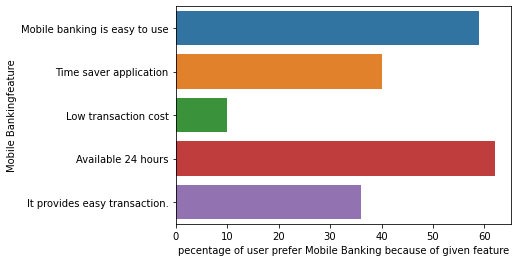

In [45]:
sns.barplot(x= value_list,y=col_char, orient = "h")
plt.xlabel('pecentage of user prefer Mobile Banking because of given feature')
plt.ylabel('Mobile Bankingfeature')

### User percentage across different Education level : Does Education level metters ?


In [46]:
len_user =len(df1[(df1['What’s your education level ? '] =='Higher educated') & (df1['Do you use mobile banking']=='Yes')])
len_total = len(df1[df1['What’s your education level ? '] =='Higher educated'])

In [47]:
print(' Percentage of people who is Higher Educated and use Mobile Banking :',round(len_user/len_total*100),'%')

 Percentage of people who is Higher Educated and use Mobile Banking : 62 %


In [48]:
len_user =len(df1[(df1['What’s your education level ? '] !='Higher educated') & (df1['Do you use mobile banking']=='Yes')])
len_total = len(df1[df1['What’s your education level ? '] !='Higher educated'])

In [49]:
print("Percentage of people who's education level is upto Secondary education  and use Mobile Banking :",round(len_user/len_total*100),'%')

Percentage of people who's education level is upto Secondary education  and use Mobile Banking : 28 %


### User percentage who faced Online transaction fraud and misplaced transaction

-  user percenatge who faced Online transaction Fraud .

In [50]:
len_fraud = len(df_user[df_user['  Have you faced any online transaction fraud  ?                    '] =='Yes'])
print('{} % user faced Online transaction Fraud .'.format(round(len_fraud/len(df_user)*100 )))

23 % user faced Online transaction Fraud .


- user percenatge who misplaced  Online transaction .

Text(0.5, 1.0, '%  of user faced Online transaction Fraud')

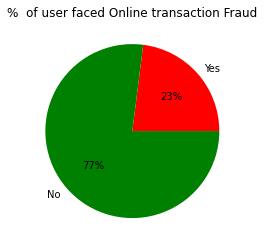

In [51]:
x = [23,77]
y = ['Yes','No']
plt.pie(x, labels = y,autopct='%.0f%%',colors = 'rg')
plt.title('%  of user faced Online transaction Fraud')

In [52]:

len_mis_trans = len(df_user[df_user['Ever did you place  mis-transaction (sent to  other person rather than actual person ) ?'] !='No'])
print('{} % user did mis Online transaction.'.format(round(len_mis_trans/len(df_user)*100 )))

35 % user did mis Online transaction.


Text(0.5, 1.0, '% user did mis Online transaction')

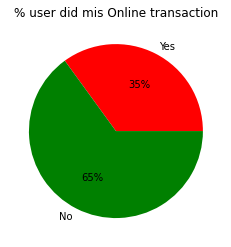

In [53]:
x = [35,65]
y = ['Yes','No']
plt.pie(x, labels = y,autopct='%.0f%%',colors = 'rg')
plt.title('% user did mis Online transaction')

In [54]:
df_user['Ever did you place  mis-transaction (sent to  other person rather than actual person ) ?'].unique()

array(['No', 'Yes, but  I did not get money back',
       'yes, but I got my money back to account'], dtype=object)

In [55]:
len_mis_trans_not_back = len(df_user[df_user['Ever did you place  mis-transaction (sent to  other person rather than actual person ) ?'] =='Yes, but  I did not get money back'])
len_mis_trans_back = len(df_user[df_user['Ever did you place  mis-transaction (sent to  other person rather than actual person ) ?'] =='yes, but I got my money back to account'])
print('{} % user who did mis Online transaction and get money back.'.format(round(len_mis_trans_back /len_mis_trans*100 )))
print('{} % user who  did mis Online transaction and not get money back'.format(round(len_mis_trans_not_back /len_mis_trans*100 )))

70 % user who did mis Online transaction and get money back.
30 % user who  did mis Online transaction and not get money back


Text(0.5, 1.0, '% of users who did Mis transaction and got Money Back')

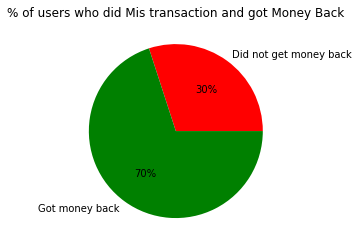

In [56]:
x = [30,70]
y = ['Did not get money back','Got money back']
plt.pie(x, labels = y,autopct='%.0f%%',colors = 'rg')
plt.title('% of users who did Mis transaction and got Money Back')

### Does Age-Group matters ?

- knowing Age group proportion in mobile Banking users

In [57]:
## Knowing age-group cetagories 
df_user['What’s  your age group ?'].unique()

array(['18- 25', '26 – 45', 'Below 18', '46- 60', '60 above'],
      dtype=object)

In [58]:
x=df_user['What’s  your age group ?'].value_counts(normalize = True,sort = True)
x_index = x.index
x_values = x.values*100
values = round(df_user['What’s  your age group ?'].value_counts(normalize = True,sort = True)*100,1)
values_index = df_user['What’s  your age group ?'].value_counts(normalize = True,sort = True).index
for j,i in zip(values_index,values) :
    print('{} age group proportion in user is {}%'.format(j,i))

18- 25 age group proportion in user is 69.8%
26 – 45 age group proportion in user is 14.0%
60 above age group proportion in user is 7.0%
46- 60 age group proportion in user is 4.7%
Below 18 age group proportion in user is 4.7%


Text(0.5, 1.0, 'proportion distribution of user across Age groups')

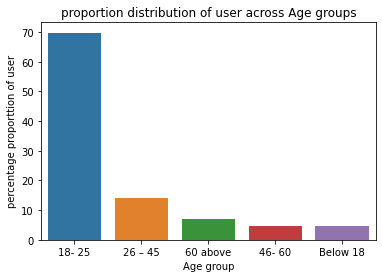

In [59]:
sns.barplot(x=x_index,
    y=x_values)    #{"hist", "kde", "ecdf"}
plt.xlabel('Age group')
plt.ylabel('percentage proporttion of user')
plt.title('proportion distribution of user across Age groups')

In [60]:
age_group =df1['What’s  your age group ?'].unique()
age_cet = []
age_prop = []
for i in age_group :
    user_prop_Age = round((len(df_user[df_user['What’s  your age group ?']== i])/len(df1[df1['What’s  your age group ?']== i]))*100,1)
    age_cet.append(i)
    age_prop.append(user_prop_Age)

Text(0, 0.5, 'user percentage ')

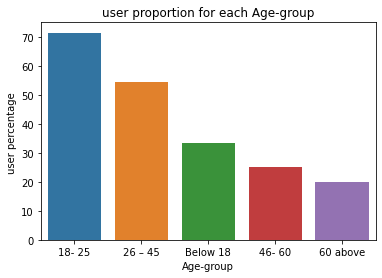

In [61]:
sns.barplot(x=age_cet, y=age_prop)
plt.title('user proportion for each Age-group')
plt.xlabel('Age-group')
plt.ylabel('user percentage ')

In [62]:
for i,j in zip(age_cet,age_prop) :
    print('{}% poeple in age-group "{}" use Mobile Banking'.format(j,i))

71.4% poeple in age-group "18- 25" use Mobile Banking
54.5% poeple in age-group "26 – 45" use Mobile Banking
33.3% poeple in age-group "Below 18" use Mobile Banking
25.0% poeple in age-group "46- 60" use Mobile Banking
20.0% poeple in age-group "60 above" use Mobile Banking


## Analysis for People who don't use Mobile Banking

In [63]:
## Data frame for non user 
df_Not_user.head()

,What’s your education level ?,What’s your age group ?,Do you use mobile banking,What is your average monthly mobile banking transaction amount ?,What is your average number of mobile banking transaction monthly ?,Have you faced any online transaction fraud ?,Ever did you place mis-transaction (sent to other person rather than actual person ) ?,What is your working profile ?,Would you like to use Mobile banking in future ?,Adv_easy_to_use,Adv_Time saver,Adv_low_cost,Adv_24_hours,Adv_easy transaction,Dis_handset_issue,Dis_hard to use,Dis_facility not available,Dis_Security_issue,Dis_ not eligible,Dis_ not aware
0,Secondary educated,18- 25,No,0,0,No,No,Student,Not sure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Higher educated,18- 25,No,0,0,No,No,Student,Yes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Higher educated,18- 25,No,0,0,No,No,Student,Yes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Higher educated,18- 25,No,0,0,No,No,Student,Not sure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,Higher educated,18- 25,No,0,0,No,No,Student,Not sure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
df_Not_user.columns

Index(['What’s your education level ? ', 'What’s  your age group ?',
       'Do you use mobile banking',
       'What is your average monthly mobile banking transaction amount ?',
       'What is your average  number of mobile banking transaction monthly ?',
       '  Have you faced any online transaction fraud  ?                    ',
       'Ever did you place  mis-transaction (sent to  other person rather than actual person ) ?',
       'What is your working profile ?',
       'Would you like to use Mobile banking in future ?', 'Adv_easy_to_use',
       'Adv_Time saver', 'Adv_low_cost', 'Adv_24_hours',
       'Adv_easy transaction', 'Dis_handset_issue', 'Dis_hard to use',
       'Dis_facility not available', 'Dis_Security_issue', 'Dis_ not eligible',
       'Dis_ not aware'],
      dtype='object')

- ## What are the most concern thing about mobile Banking for non user 

In [65]:
col_disadv = ['Dis_handset_issue', 'Dis_hard to use','Dis_facility not available', 'Dis_Security_issue', 'Dis_ not eligible','Dis_ not aware']
col_char = ['My handset does not have the capability to use mobile banking','Mobile banking is hard to use','Required facility not available'
,'Security issues','I am not eligible','I am not aware about Mobile Banking']
value_list = []
for i,j in zip(col_disadv,col_char) :
    value_list.append(round(sum(df_Not_user[i])*100/len(df_Not_user)))
    print('{}% of user prefer Mobile Banking because, {}.'.format(round(sum(df_Not_user[i])*100/len(df_Not_user)), j))

22% of user prefer Mobile Banking because, My handset does not have the capability to use mobile banking.
32% of user prefer Mobile Banking because, Mobile banking is hard to use.
3% of user prefer Mobile Banking because, Required facility not available.
51% of user prefer Mobile Banking because, Security issues.
10% of user prefer Mobile Banking because, I am not eligible.
35% of user prefer Mobile Banking because, I am not aware about Mobile Banking.


Text(0, 0.5, 'Concern of Non users')

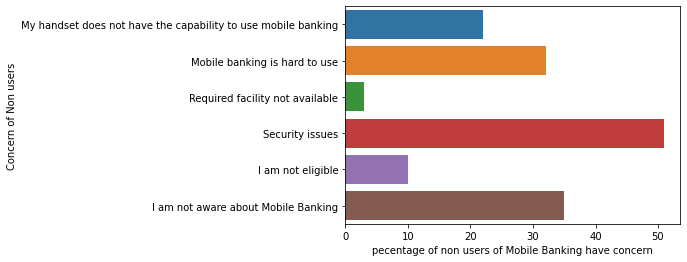

In [66]:
sns.barplot(x= value_list,y=col_char, orient = "h")
plt.xlabel('pecentage of non users of Mobile Banking have concern')
plt.ylabel('Concern of Non users')

- ### does concern vary with age group ?
- ### What are the most concern thing about mobile Banking for non user of age above 45 ?

In [67]:
## Defing dataframe for age above 45 and not a user 
df_Not_user_above45  = df_Not_user[(df_Not_user['What’s  your age group ?']=='46- 60') | (df_Not_user['What’s  your age group ?']== '60 above')]
col_disadv = ['Dis_handset_issue', 'Dis_hard to use','Dis_facility not available', 'Dis_Security_issue', 'Dis_ not eligible','Dis_ not aware']
col_char = ['My handset does not have the capability to use mobile banking','Mobile banking is hard to use','Required facility not available'
,'Security issues','I am not eligible','I am not aware about Mobile Banking']
value_list = []
for i,j in zip(col_disadv,col_char) :
    value_list.append(round(sum(df_Not_user_above45[i])*100/len(df_Not_user_above45)))
    print('{}% of user prefer Mobile Banking because, {}.'.format(round(sum(df_Not_user_above45[i])*100/len(df_Not_user_above45)), j))

31% of user prefer Mobile Banking because, My handset does not have the capability to use mobile banking.
67% of user prefer Mobile Banking because, Mobile banking is hard to use.
0% of user prefer Mobile Banking because, Required facility not available.
72% of user prefer Mobile Banking because, Security issues.
0% of user prefer Mobile Banking because, I am not eligible.
31% of user prefer Mobile Banking because, I am not aware about Mobile Banking.


Text(0, 0.5, 'Concern of Non users')

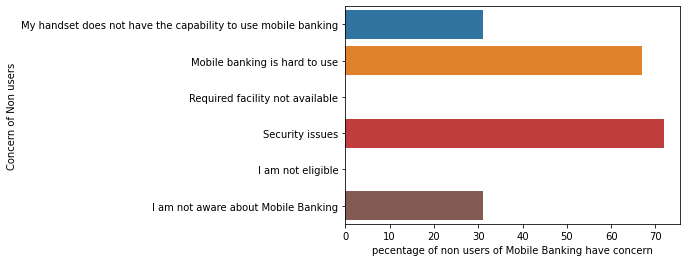

In [68]:
sns.barplot(x= value_list,y=col_char, orient = "h")
plt.xlabel('pecentage of non users of Mobile Banking have concern')
plt.ylabel('Concern of Non users')

### what is the population proportion who don't use Mobile banking but would like to use in future

In [69]:
df_Not_user['Would you like to use Mobile banking in future ?'].value_counts(normalize = True)

Yes         0.500000
No          0.346154
Not sure    0.153846
Name: Would you like to use Mobile banking in future ?, dtype: float64

### what is the population proportion who don't use Mobile banking and Age group above 45 year old but would like to use in future

In [70]:
df_Not_user[(df_Not_user['What’s  your age group ?']=='46- 60') | (df_Not_user['What’s  your age group ?']== '60 above')]['Would you like to use Mobile banking in future ?'].value_counts(normalize = True)

Yes         0.472222
No          0.444444
Not sure    0.083333
Name: Would you like to use Mobile banking in future ?, dtype: float64

### what is the population proportion who don't use Mobile banking and Age group above 45 year old but would like to use in future and having issue "Mobile banking is hard to use"

In [71]:
df_Not_user[(df_Not_user['Dis_hard to use']==1) & ((df_Not_user['What’s  your age group ?']=='46- 60') | (df_Not_user['What’s  your age group ?']== '60 above'))]['Would you like to use Mobile banking in future ?'].value_counts(normalize = True)

Yes         0.583333
No          0.375000
Not sure    0.041667
Name: Would you like to use Mobile banking in future ?, dtype: float64

## Conclusion

- There is a evidence, that age group of person have significant effect whether person is  Mobile Banking user or not.
- 	large proportion of mobile banking user come from young age-group, most convincing feature of Mobile banking is availability of 24 hour of Mobile Banking service, 59% user use because of Mobile Banking is easy to use, hance company should make User interference more user friendly.
- 23% user have faced Online transaction fraud, which is significantly high, on other hand 35% user have placed Mis-transaction, out of which 30% user didn't get money back. this type of user experience discourage non user to use Mobile banking, company should make transaction safer and tackle the problem of mis-transaction problem, Mis-transaction sound common mistake by users
- Non user have one of the biggest concerns is Security issue, around 72% non-user shown this concern, which discourage people to use Mobile banking and we can correlate it with user's experience percentage of Online transactional fraud and Mis-transaction issue.
- 2nd biggest issue is 'Mobile banking' is hard to use ,since older age group have higher contribution in non-user, they are less likely to adopt new technology , hence company should make it easier to use.

- around 50% non-user said they would like to use Mobile Banking, it seems encouraging proportion, which may imply that non user is willing to use but they don't have required knowledge ( as 67% non-user accept Mobile Banking hard to use a and 31% of user accept not aware about Mobile Banking.).

- Hance, companies should work on security issue, mistranslation issue and make more friendly UI as well as make people more aware about Mobile banking by campaign and advertisement